In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("roundnessdata.csv")

In [29]:
train_X = train_df.iloc[:,33:93] 

train_y_letters = train_df.iloc[:,0:1]

sc = StandardScaler()
train_X = sc.fit_transform(train_X)

pca = PCA()
train_X = pca.fit_transform(train_X)

dummy_y= train_y_letters
n_cols  = train_X.shape[1]
model = Sequential()
model.add(Dense(50, activation="relu", input_shape=(n_cols,)))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer='adam', loss='mean_squared_error')
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=4)
#train model
model.fit(train_X, dummy_y, validation_split=0.2, epochs=1000, callbacks=[early_stopping_monitor], verbose = 0)
ynew = model.predict(train_X)
diff = abs(ynew - dummy_y)
dummy_y['predicted'] = ynew
dummy_y

,roundness,predicted
0,0.110338,0.097303
1,0.113058,0.136786
2,0.103818,0.107188
3,0.103408,0.137982
4,0.111414,0.116282
5,0.113058,0.099981
6,0.085094,0.033512
7,0.101252,0.078166
8,0.107169,0.087184
9,0.110233,0.106291


<function matplotlib.pyplot.show(*args, **kw)>

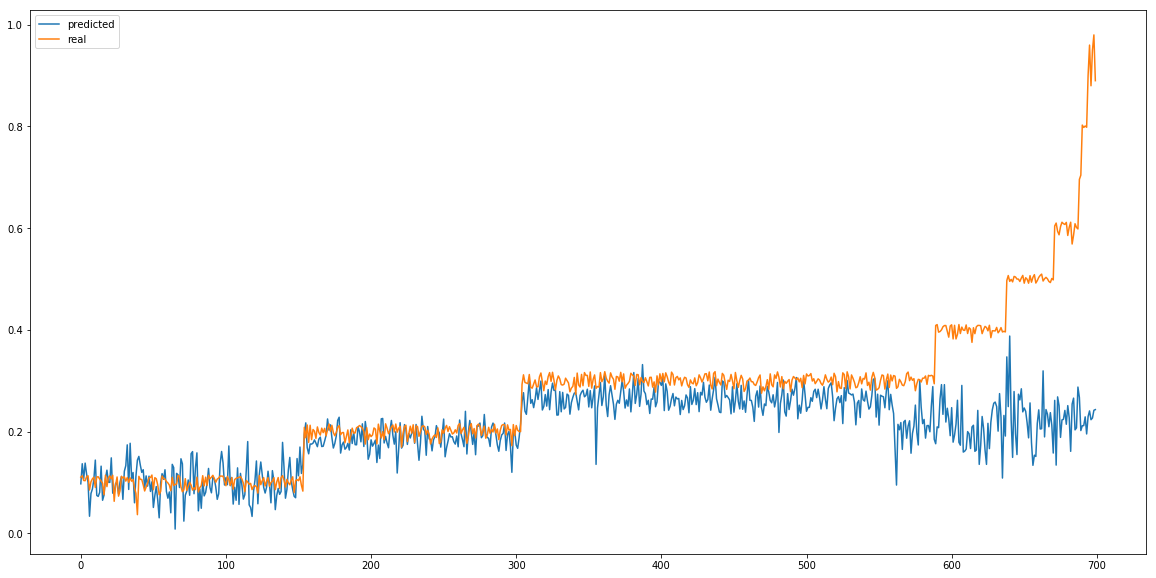

In [30]:
plt.figure(figsize=(20,10))
plt.plot(dummy_y['predicted'], label="predicted")
plt.plot(dummy_y['roundness'], label="real")
plt.legend(loc="upper left")
plt.show
